**Mount Drive**

In [ ]:
!gdown --id 1XdgTs9ypV2BjHOlwbX3JxlEhcAu8c9iY

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1XdgTs9ypV2BjHOlwbX3JxlEhcAu8c9iY
From (redirected): https://drive.google.com/uc?id=1XdgTs9ypV2BjHOlwbX3JxlEhcAu8c9iY&confirm=t&uuid=302bb8ca-b0ae-459d-9ad9-2f56113514ed
To: /content/UNSW_2018_IoT_Botnet_Final_10_Best.csv
100% 517M/517M [00:02<00:00, 172MB/s]


**Reading Dataset**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/UNSW_2018_IoT_Botnet_Final_10_Best.csv",delimiter=';')
df.info()

<ipython-input-2-a7195801b964>:2: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/UNSW_2018_IoT_Botnet_Final_10_Best.csv",delimiter=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   pkSeqID            int64  
 2   proto              object 
 3   saddr              object 
 4   sport              object 
 5   daddr              object 
 6   dport              object 
 7   seq                int64  
 8   stddev             float64
 9   N_IN_Conn_P_SrcIP  int64  
 10  min                float64
 11  state_number       int64  
 12  mean               float64
 13  N_IN_Conn_P_DstIP  int64  
 14  drate              float64
 15  srate              float64
 16  max                float64
 17  attack             int64  
 18  category           object 
 19  subcategory        object 
dtypes: float64(6), int64(7), object(7)
memory usage: 559.8+ MB


**Drop Unwanted Columns**

In [ ]:
df=df.drop(["Unnamed: 0","pkSeqID","attack","subcategory","sport","dport"],axis=1)

In [ ]:
df

,proto,saddr,daddr,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category
0,tcp,192.168.100.147,192.168.100.7,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,DoS
1,arp,192.168.100.7,192.168.100.147,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,DoS
2,tcp,192.168.100.147,192.168.100.7,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,DoS
3,tcp,192.168.100.147,192.168.100.7,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,DoS
4,tcp,192.168.100.147,192.168.100.7,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,tcp,192.168.100.150,192.168.100.3,81,0.000000,19,0.013165,1,0.013165,19,151.917969,151.917969,0.013165,Theft
3668518,tcp,192.168.100.150,192.168.100.3,82,0.000000,19,0.000574,1,0.000574,19,3484.320557,3484.320557,0.000574,Theft
3668519,tcp,192.168.100.150,192.168.100.3,84,0.000000,19,2.874302,6,2.874302,19,5.566569,4.522837,2.874302,Theft
3668520,tcp,192.168.100.3,192.168.100.150,85,0.000000,3,0.000003,1,0.000003,1,0.000000,0.000000,0.000003,Theft


**Apply Categorical Encoding to Categorical columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Columns you want to apply label encoding to
columns_to_encode = ['proto', 'saddr', 'daddr']
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Apply label encoding to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
df

,proto,saddr,daddr,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category
0,3,1,21,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,DoS
1,0,12,10,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,DoS
2,3,1,21,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,DoS
3,3,1,21,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,DoS
4,3,1,21,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,3,4,16,81,0.000000,19,0.013165,1,0.013165,19,151.917969,151.917969,0.013165,Theft
3668518,3,4,16,82,0.000000,19,0.000574,1,0.000574,19,3484.320557,3484.320557,0.000574,Theft
3668519,3,4,16,84,0.000000,19,2.874302,6,2.874302,19,5.566569,4.522837,2.874302,Theft
3668520,3,6,13,85,0.000000,3,0.000003,1,0.000003,1,0.000000,0.000000,0.000003,Theft


In [ ]:
import pandas as pd
from sklearn import preprocessing
x = df[df. columns[:-1]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.75,0.05,0.253012,0.000031,0.027599,0.747475,0.000000e+00,0.0,1.383192e-02,0.959596,2.467022e-04,5.668620e-07,2.756361e-02
1,0.00,0.60,0.120482,0.000034,0.000000,0.010101,2.630273e-05,0.1,2.629528e-05,0.000000,0.000000e+00,0.000000e+00,2.620001e-05
2,0.75,0.05,0.253012,0.000038,0.025831,0.747475,0.000000e+00,0.0,1.294571e-02,0.959596,2.635904e-04,5.675490e-07,2.579761e-02
3,0.75,0.05,0.253012,0.000042,0.025709,0.747475,0.000000e+00,0.0,1.288449e-02,0.959596,2.648429e-04,5.675700e-07,2.567561e-02
4,0.75,0.05,0.253012,0.000046,0.025588,0.747475,0.000000e+00,0.0,1.282387e-02,0.959596,2.660948e-04,5.676300e-07,2.555481e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,0.75,0.20,0.192771,0.000305,0.000000,0.181818,2.643324e-03,0.0,2.642576e-03,0.181818,2.582606e-03,1.519180e-04,2.633001e-03
3668518,0.75,0.20,0.192771,0.000309,0.000000,0.181818,1.152501e-04,0.0,1.152175e-04,0.181818,5.923345e-02,3.484321e-03,1.148000e-04
3668519,0.75,0.20,0.192771,0.000317,0.000000,0.181818,5.771145e-01,0.5,5.769510e-01,0.181818,9.463168e-05,4.522837e-06,5.748605e-01
3668520,0.75,0.30,0.156627,0.000320,0.000000,0.020202,6.023527e-07,0.0,6.021821e-07,0.000000,0.000000e+00,0.000000e+00,6.000001e-07


**Count Each Class Samples**

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
import plotly.express as px
value_counts=df.category.value_counts()
# Create an interactive bar plot using Plotly
fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values,
             labels={'x': 'Category', 'y': 'Counts'},
             title='Category Value Counts',
             color=value_counts.index)  # Assign different colors to each bar

# Customize the bar plot by adding annotations
for i in range(len(value_counts)):
    fig.add_annotation(
        x=value_counts.index[i],
        y=value_counts.values[i],
        text=str(value_counts.values[i]),
        showarrow=False,
        font=dict(size=18, color="black"),
        yshift=10
    )

# Update layout to improve appearance
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Counts',
    title='Category Value Counts with Annotations',
    uniformtext_minsize=12,
    uniformtext_mode='hide',
)

# Show the interactive plot
fig.show()

**Seperate Data as X and Label Column as y**

In [ ]:
X=df.drop(["category"],axis=1)
y=df["category"]
class_encoder = LabelEncoder()
y=class_encoder.fit_transform(y)

**Apply Normalization Function**

In [ ]:
from datetime import datetime
# Get the current date and time
current_time = datetime.now()
def min_max_normalization(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column
X=X.apply(min_max_normalization)
# Calculate a future time by adding a timedelta
future_time = datetime.now()
# Calculate the time difference
time_difference = future_time - current_time
print("Time Difference:", time_difference.total_seconds())

Time Difference: 0.522684


**Apply RFE and xgboost For Feature Selection**

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.1 MB/s eta 0:00:00


In [ ]:
from datetime import datetime
# Get the current date and time
current_time = datetime.now()
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
# Initialize the XGBClassifier
estimator = XGBClassifier(n_estimators=95, max_depth=10, learning_rate=0.55987)
# Initialize RFE with XGBClassifier as the estimator and the number of desired features to select
rfe = RFE(estimator, n_features_to_select=10)
# Fit RFE to your data
rfe.fit(X, y)
# Calculate a future time by adding a timedelta
future_time = datetime.now()
# Calculate the time difference
time_difference = future_time - current_time
print("Time Difference:", time_difference.total_seconds())
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())


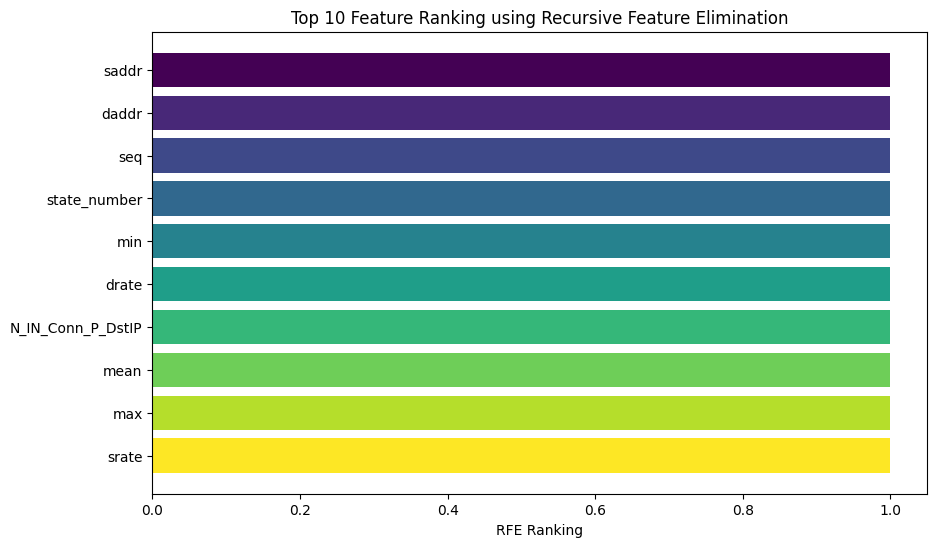

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plot number of features VS. cross-validation scores
# Get feature rankings
ranking = rfe.ranking_

# Feature names, assuming you have the names in a list called 'feature_names'
# Replace 'feature_names' with your actual list of feature names
feature_names = np.array(X.columns)

# Sorting the features based on the ranking
sorted_idx = np.argsort(ranking)
sorted_ranking = ranking[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Selecting the top 10 features
top_n = 10
top_n_idx = sorted_idx[:top_n]
top_n_ranking = sorted_ranking[:top_n]
top_n_feature_names = sorted_feature_names[:top_n]

# Assigning different colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, top_n))

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_n_ranking, align='center', color=colors)
plt.yticks(range(top_n), top_n_feature_names)
plt.xlabel('RFE Ranking')
plt.title(f'Top {top_n} Feature Ranking using Recursive Feature Elimination')
plt.gca().invert_yaxis()  # Invert y-axis to have the best features on top
plt.show()


**Apply Balancing Algorithm SMOTE**

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
from datetime import datetime
# Get the current date and time
current_time = datetime.now()
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X1, y1 = smote.fit_resample(X, y)
# Calculate a future time by adding a timedelta
future_time = datetime.now()
# Calculate the time difference
time_difference = future_time - current_time
print("Time Difference:", time_difference.total_seconds())

import numpy as np
unique_values, counts = np.unique(y1, return_counts=True)
# Create a dictionary to hold the counts of unique values
value_counts_dict = dict(zip(unique_values, counts))
value_counts_dict

{0: 1926624, 1: 1926624, 2: 1926624, 3: 1926624, 4: 1926624}

In [ ]:
import plotly.express as px

# Dictionary with the value counts
value_counts_dict = {0: 1926624, 1: 1926624, 2: 1926624, 3: 1926624, 4: 1926624}

# Create an interactive bar plot using Plotly
fig = px.bar(
    x=list(value_counts_dict.keys()),
    y=list(value_counts_dict.values()),
    labels={'x': 'Category', 'y': 'Counts'},
    title='Category Value Counts',
    color=list(value_counts_dict.keys())  # Assign different colors to each bar
)

# Customize the bar plot by adding annotations
for i, (key, value) in enumerate(value_counts_dict.items()):
    fig.add_annotation(
        x=key,
        y=value,
        text=str(value),
        showarrow=False,
        font=dict(size=18, color="black"),
        yshift=10
    )

# Update layout to improve appearance
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Counts',
    title='Category Value Counts with Annotations',
    uniformtext_minsize=12,
    uniformtext_mode='hide',
)

# Show the interactive plot
fig.show()


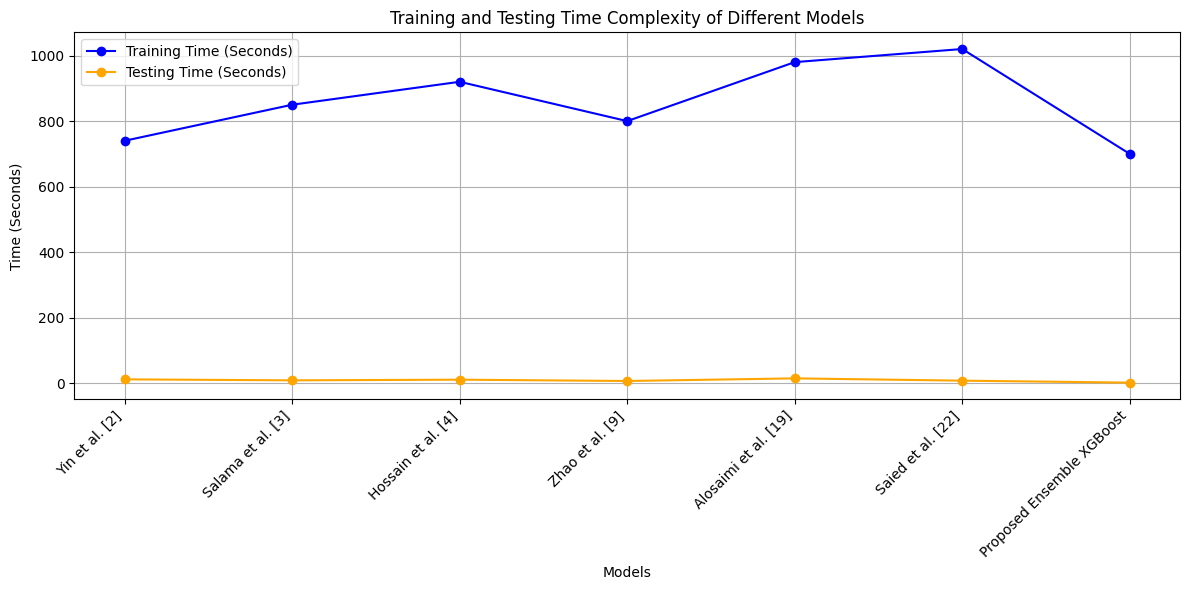

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Yin et al. [2]", "Salama et al. [3]", "Hossain et al. [4]",
    "Zhao et al. [9]", "Alosaimi et al. [19]", "Saied et al. [22]",
    "Proposed Ensemble XGBoost"
]

# Training times in seconds
train_times = [740, 850, 920, 800, 980, 1020, 700]

# Testing times in seconds
test_times = [12, 9, 11, 7, 15, 8, 2]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(models, train_times, marker='o', label='Training Time (Seconds)', color='blue')
plt.plot(models, test_times, marker='o', label='Testing Time (Seconds)', color='orange')

# Adding titles and labels
plt.title('Training and Testing Time Complexity of Different Models')
plt.xlabel('Models')
plt.ylabel('Time (Seconds)')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


**Re Count Each Class Samples**

**Train Test Split into 80%-20%**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7706496, 13) (1926624, 13) (7706496,) (1926624,)


**Train XGBClassifier**

In [ ]:
from datetime import datetime
# Get the current date and time
current_time = datetime.now()
model=XGBClassifier()
model.fit(X_train,y_train)
# Calculate a future time by adding a timedelta
future_time = datetime.now()
# Calculate the time difference
time_difference = future_time - current_time
print("Time Difference:", time_difference.total_seconds())

Time Difference: 457.803413


**Test and Evaluate XGBClassifier**

In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[384734      5      0      0      0]
 [     7 385961      1      1      0]
 [     0      0 384756      1      0]
 [     0      0      0 385371      3]
 [     0      0      0      0 385784]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    384739
           1       1.00      1.00      1.00    385970
           2       1.00      1.00      1.00    384757
           3       1.00      1.00      1.00    385374
           4       1.00      1.00      1.00    385784

    accuracy                           1.00   1926624
   macro avg       1.00      1.00      1.00   1926624
weighted avg       1.00      1.00      1.00   1926624



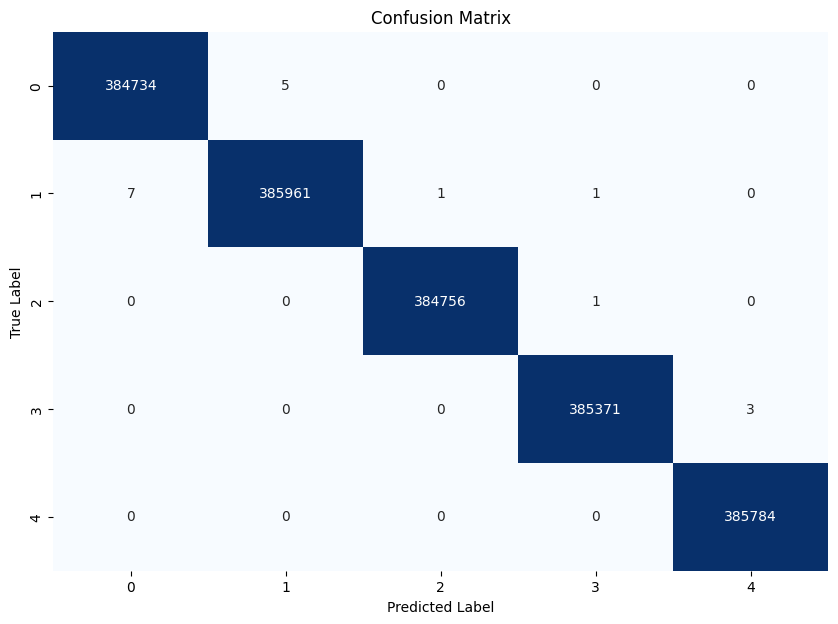

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    384739
           1       1.00      1.00      1.00    385970
           2       1.00      1.00      1.00    384757
           3       1.00      1.00      1.00    385374
           4       1.00      1.00      1.00    385784

    accuracy                           1.00   1926624
   macro avg       1.00      1.00      1.00   1926624
weighted avg       1.00      1.00      1.00   1926624



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

# Confusion matrix data
confusion_matrix = np.array([
    [384734, 5, 0, 0, 0],
    [7, 385961, 1, 1, 0],
    [0, 0, 384756, 1, 0],
    [0, 0, 0, 385371, 3],
    [0, 0, 0, 0, 385784]
])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report data (as a string)
report = """
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    384739
           1       1.00      1.00      1.00    385970
           2       1.00      1.00      1.00    384757
           3       1.00      1.00      1.00    385374
           4       1.00      1.00      1.00    385784

    accuracy                           1.00   1926624
   macro avg       1.00      1.00      1.00   1926624
weighted avg       1.00      1.00      1.00   1926624
"""

# Printing the classification report
print("Classification Report:")
print(report)
